In [39]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


In [54]:
vals = np.random.normal(0, 1, size=(1_000, 2_000))
vals

array([[-1.40841933,  0.4194018 ,  0.97347561, ..., -1.13176707,
        -0.75587191,  0.02718475],
       [-0.96247471,  0.14954042, -0.71233941, ...,  1.54436389,
        -0.57171761, -1.17780351],
       [ 0.71892699, -0.06631033,  0.0312235 , ...,  1.74082838,
        -1.13028572, -0.86683687],
       ...,
       [ 0.46631234,  0.92403002, -0.07103528, ...,  0.13975229,
         0.28002412, -1.06757599],
       [-1.54402497,  0.11068692,  0.56032177, ...,  0.15932659,
        -1.16941375,  0.76565185],
       [ 0.82090573, -0.45007238, -0.04613889, ...,  1.41090239,
         2.53150657,  0.48759599]])

In [69]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans



kmeans = KMeans(n_clusters=2).fit(vals)
kmeans

KMeans(n_clusters=2)

In [70]:
cluster_1 = vals[np.where(kmeans.labels_ == 0)]
cluster_2 = vals[np.where(kmeans.labels_ == 1)]
cluster_1.shape, cluster_2.shape

((478, 2000), (522, 2000))

In [71]:
ttests = []
for vals_1, vals_2 in zip(cluster_1.T, cluster_2.T):
    ttests.append(stats.ttest_ind(vals_1, vals_2).pvalue)


In [72]:
min(ttests)

1.7311131150188152e-06

In [73]:
sorted(ttests)

[1.7311131150188152e-06,
 1.0361571470696209e-05,
 3.353810370482026e-05,
 4.594741562968113e-05,
 6.603312596553842e-05,
 9.025106571769402e-05,
 9.231125566341567e-05,
 0.00010582043432789449,
 0.00012801583431212488,
 0.00014590495921178778,
 0.00023684538438929807,
 0.0003161827906113079,
 0.0003198899997222257,
 0.00036850499082650273,
 0.000424078597224201,
 0.0005010108892507357,
 0.0005222261283153443,
 0.0006086182571765745,
 0.0006697325623223012,
 0.0006816423398411855,
 0.000692382255375577,
 0.000852111985539754,
 0.0008535985995839425,
 0.0009053404128217955,
 0.0009588005381112134,
 0.0009672907328193183,
 0.0010806993894912963,
 0.0012187452088128876,
 0.001432530551698517,
 0.00163468455858851,
 0.0016359231257919717,
 0.0017212793799392257,
 0.0017725794328450014,
 0.001900676838298144,
 0.0020441165388504615,
 0.002100958560388815,
 0.002307149235352665,
 0.002355445104161684,
 0.0023779453772497885,
 0.0025152425321746125,
 0.0025473814833813966,
 0.0025803489453246

In [93]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', perplexity=3).fit_transform(vals[:, np.where(np.array(ttests) < 0.001)[0]])
X_embedded.shape


/home/sande/miniconda3/envs/phylotypic_hourglass/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(1000, 2)

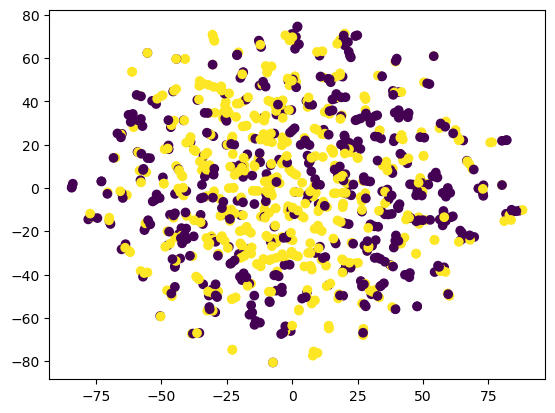

In [94]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans.labels_)